In [1]:
# Imports
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model


In [2]:
# Verify the version
print(tf.__version__)

2.12.0


In [3]:
# Loading the dataset
Cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = Cifar10.load_data()

In [4]:
# Defining array. Each item of array represent integer value of labels. 10 item for 10 integer label

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

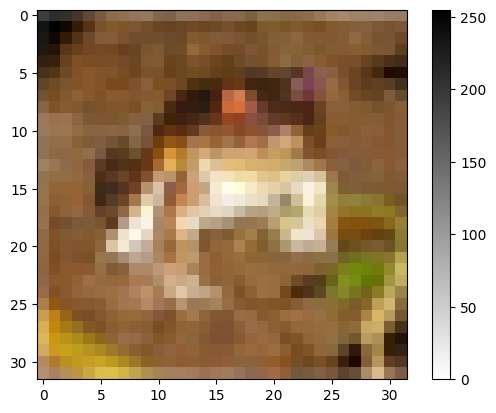

Class ID: [6] and Class name: Frog


In [5]:
# inspect the data in the array

index = 0
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.colorbar()
plt.show()
print("Class ID: %s and Class name: %s" % (y_train[index], class_names[y_train[index][0]]))

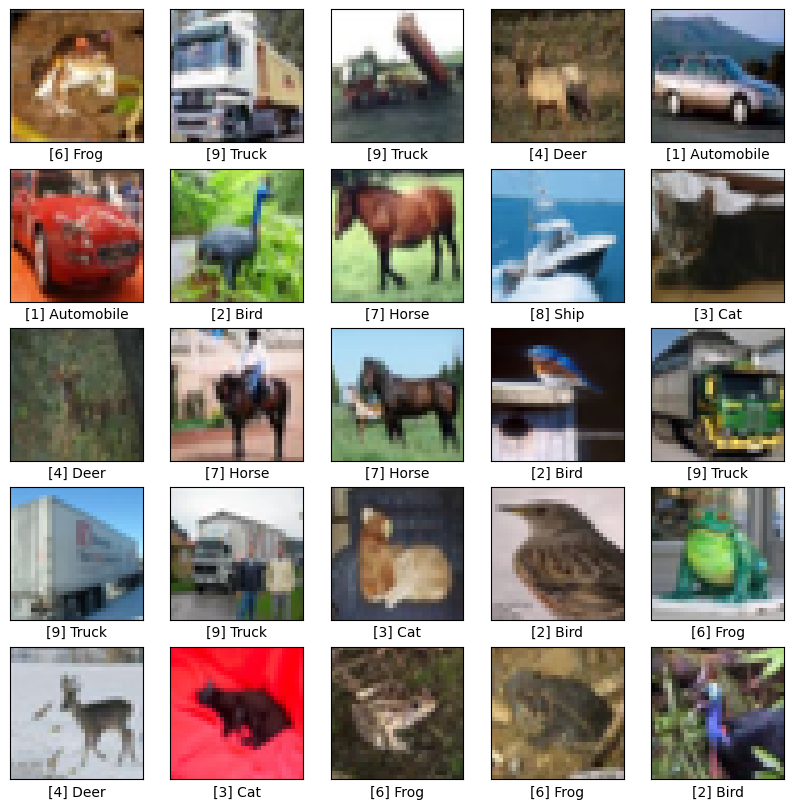

In [6]:
# display the first 25 images from traing set

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i][0]]))
plt.show()

In [7]:
# Pixel value of the image falls between 0 to 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

In [8]:
# One hot encoding of the labels

num_classes = 10
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

In [9]:
# Define the Convolutional Neural Network
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [10]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden_1'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', name='hidden_2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='predictions'))

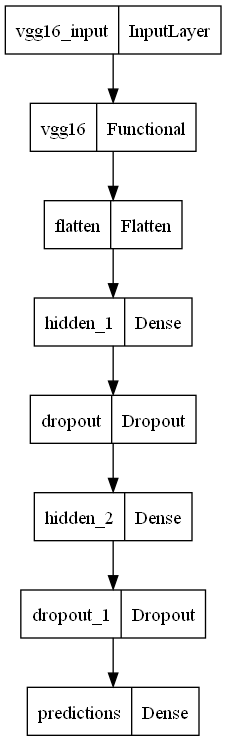

In [11]:
# Plot model graph
plot_model(model, 'model.png')

In [12]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# # Train the model with an EarlyStopping and ModelCheckpoint callbacks

es_cb = EarlyStopping(monitor='val_loss', patience=5)

filepath = "weights.h5"
mc = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')

callbacks_list = [es_cb, mc]

In [14]:
history = model.fit(
    x_train, y_train, epochs=100, verbose=1, batch_size=128, validation_split=0.2, callbacks=callbacks_list
)

Epoch 1/100
313/313 [==============================] - 87s 273ms/step - loss: 1.4625 - accuracy: 0.4832 - val_loss: 1.2628 - val_accuracy: 0.5556
Epoch 2/100
313/313 [==============================] - 91s 292ms/step - loss: 1.2319 - accuracy: 0.5665 - val_loss: 1.1747 - val_accuracy: 0.5850
Epoch 3/100
313/313 [==============================] - 94s 301ms/step - loss: 1.1553 - accuracy: 0.5967 - val_loss: 1.1434 - val_accuracy: 0.6019
Epoch 4/100
313/313 [==============================] - 93s 297ms/step - loss: 1.1010 - accuracy: 0.6135 - val_loss: 1.1354 - val_accuracy: 0.6023
Epoch 5/100
313/313 [==============================] - 97s 309ms/step - loss: 1.0619 - accuracy: 0.6259 - val_loss: 1.1197 - val_accuracy: 0.6137
Epoch 6/100
313/313 [==============================] - 98s 312ms/step - loss: 1.0211 - accuracy: 0.6409 - val_loss: 1.1138 - val_accuracy: 0.6153
Epoch 7/100
313/313 [==============================] - 100s 321ms/step - loss: 0.9839 - accuracy: 0.6526 - val_loss: 1.1119 

In [15]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 27s 87ms/step - loss: 1.1409 - accuracy: 0.6176
[1.1408590078353882, 0.6176000237464905]


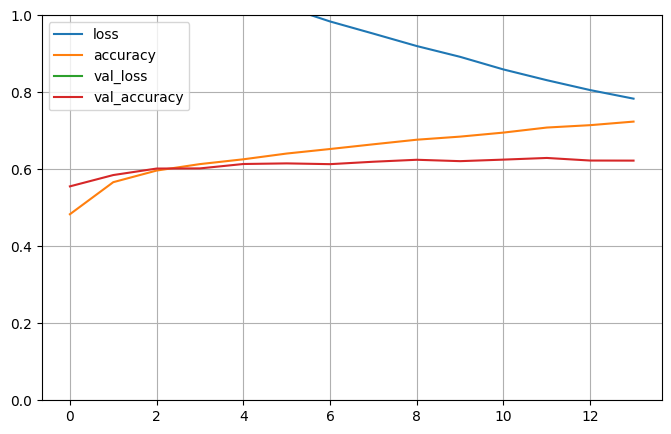

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Новый раздел

In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [18]:
#let's do additional training of the last three layers

for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [19]:
modified_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = modified_model.fit(
    x_train, y_train, epochs=20, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/20
313/313 [==============================] - 257s 818ms/step - loss: 1.0802 - accuracy: 0.6233 - val_loss: 0.9234 - val_accuracy: 0.6792
Epoch 2/20
313/313 [==============================] - 267s 853ms/step - loss: 0.7662 - accuracy: 0.7341 - val_loss: 0.7931 - val_accuracy: 0.7190
Epoch 3/20
313/313 [==============================] - 267s 853ms/step - loss: 0.6328 - accuracy: 0.7784 - val_loss: 0.7686 - val_accuracy: 0.7314
Epoch 4/20
313/313 [==============================] - 269s 860ms/step - loss: 0.5288 - accuracy: 0.8142 - val_loss: 0.7387 - val_accuracy: 0.7497
Epoch 5/20
313/313 [==============================] - 270s 862ms/step - loss: 0.4245 - accuracy: 0.8491 - val_loss: 0.7517 - val_accuracy: 0.7524
Epoch 6/20
313/313 [==============================] - 270s 862ms/step - loss: 0.3268 - accuracy: 0.8857 - val_loss: 0.8733 - val_accuracy: 0.7306
Epoch 7/20
313/313 [==============================] - 271s 866ms/step - loss: 0.2401 - accuracy: 0.9173 - val_loss: 0.9413 -

In [20]:
results = modified_model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 30s 95ms/step - loss: 1.4731 - accuracy: 0.7341
[1.473131537437439, 0.7340999841690063]


In [21]:
modified_model.save("weights.h5")